In [14]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 8.3 MB/s eta 0:00:18
    --------------------------------------- 2.9/150.0 MB 8.8 MB/s eta 0:00:17
   - -------------------------------------- 5.0/150.0 MB 9.4 MB/s eta 0:00:16
   -- ------------------------------------- 7.6/150.0 MB 10.4 MB/s eta 0:00:14
   -- ------------------------------------- 10.2/150.0 MB 10.8 MB/s eta 0:00:13
   --- ------------------------------------ 13.4/150.0 MB 11.3 MB/s eta 0:00:13
   ---- ----------------------------------- 16.3/150.0 MB 11.6 MB/s eta 0:00:12
   ----- ---------------------------------- 18.9/150.0 MB 11.9 MB/s eta 0:00:12
   ------ --------------------------------- 22.8/150.0 MB 12.7 MB/s eta 0:00:11
   ------- -------------------------------- 26.5/150.0 MB 13.1 MB/s eta 0:00:10
   -------- ------------------------------- 30.4/150.0 MB 13.7 MB/s eta 0:00:09
   --------- ------------------------------ 34.1/150.0 M

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\vinay\Downloads\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

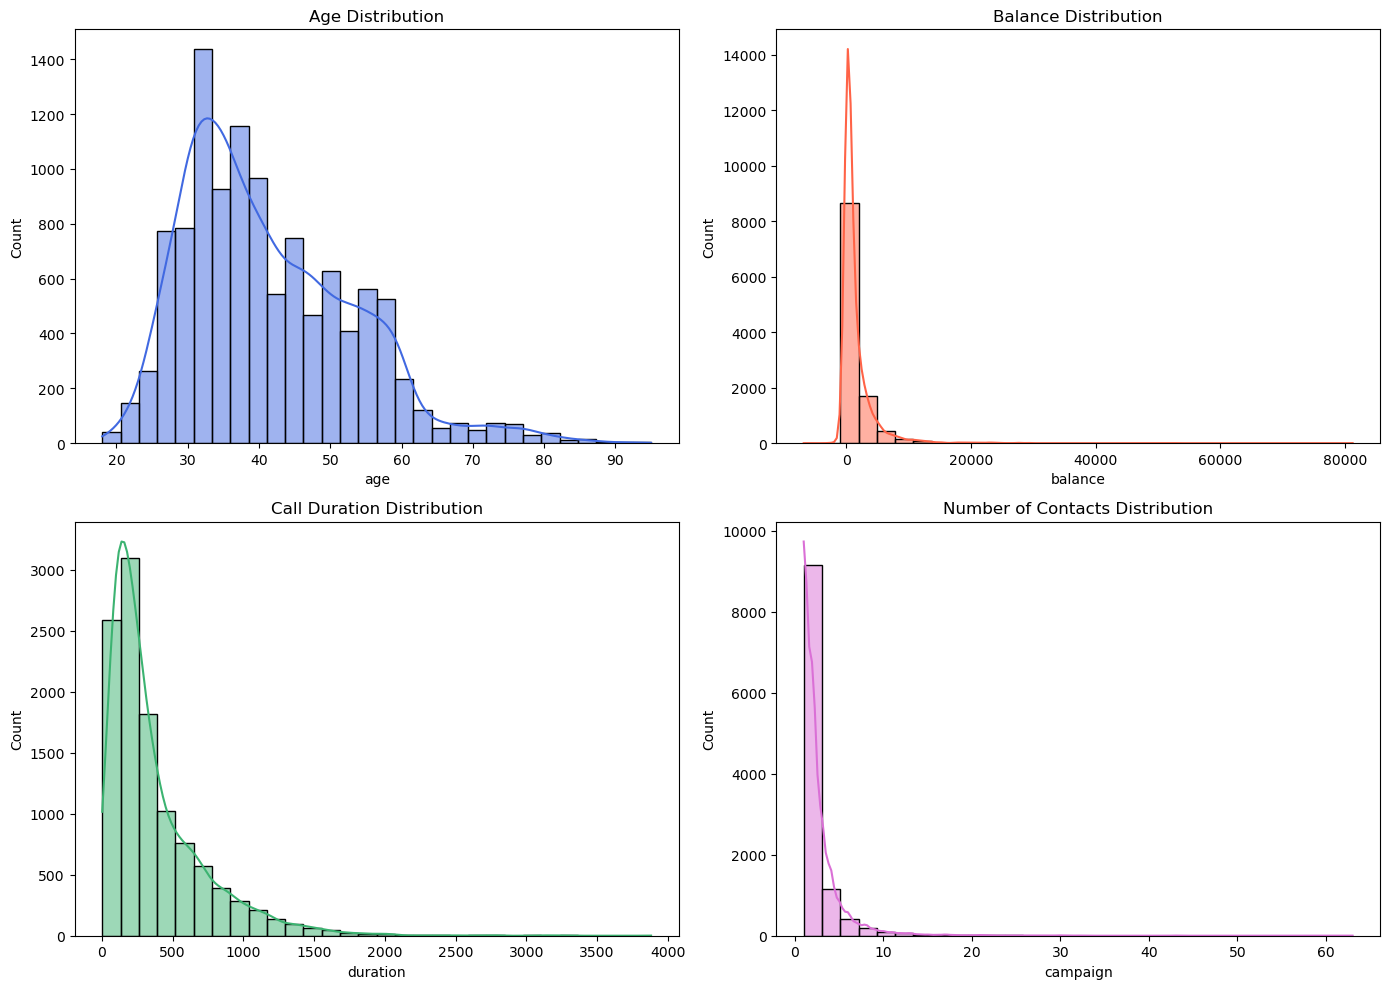

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.histplot(df['age'], bins=30, kde=True, ax=axs[0,0], color='royalblue')
axs[0,0].set_title('Age Distribution')

sns.histplot(df['balance'], bins=30, kde=True, ax=axs[0,1], color='tomato')
axs[0,1].set_title('Balance Distribution')

sns.histplot(df['duration'], bins=30, kde=True, ax=axs[1,0], color='mediumseagreen')
axs[1,0].set_title('Call Duration Distribution')

sns.histplot(df['campaign'], bins=30, kde=True, ax=axs[1,1], color='orchid')
axs[1,1].set_title('Number of Contacts Distribution')

plt.tight_layout()
plt.show()

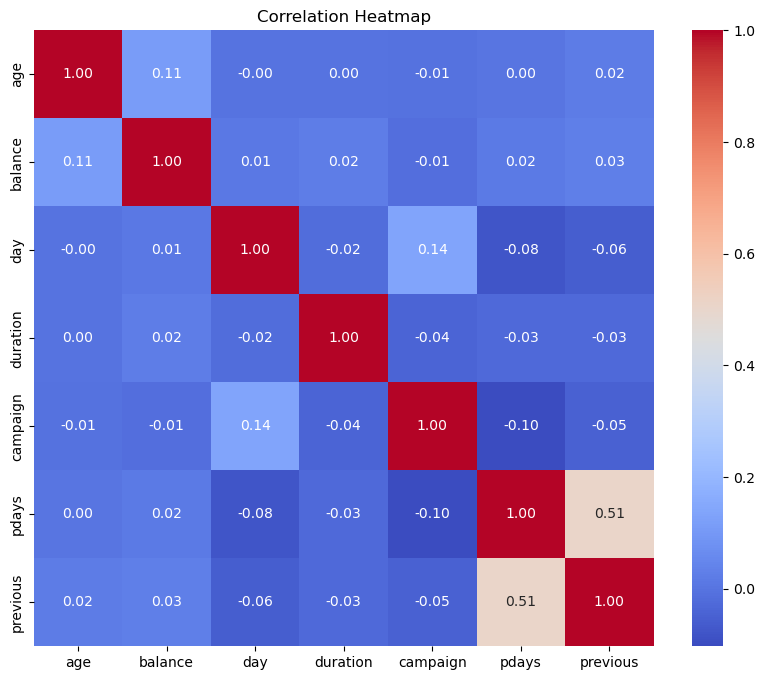

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [16]:
data = df.copy()

# encode categorical variables
cat_cols = data.select_dtypes(include=['object']).columns

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1166
           1       0.75      0.71      0.73      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



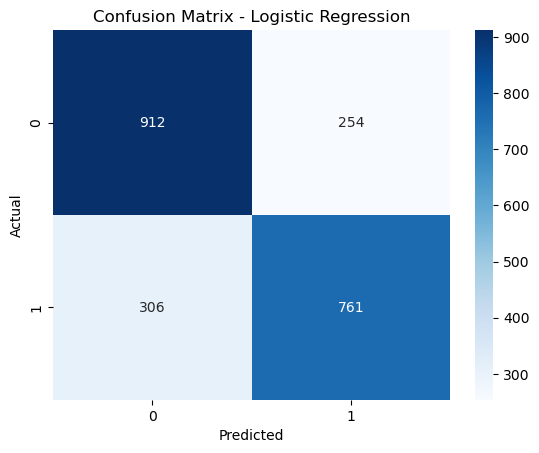

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



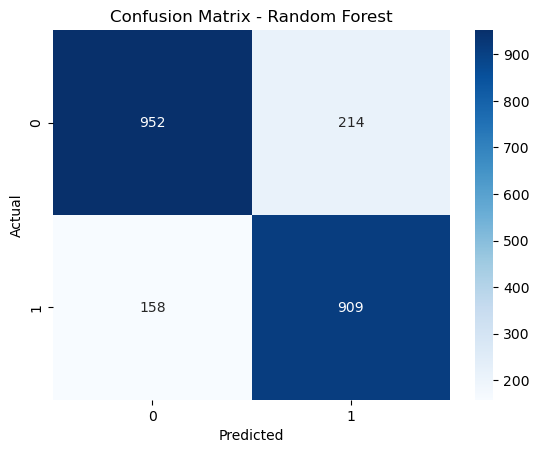

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1166
           1       0.82      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



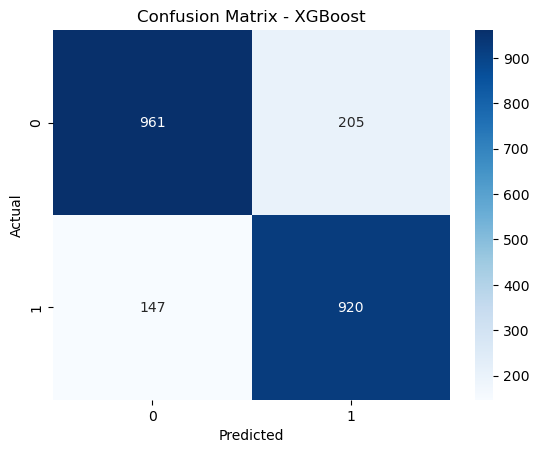

In [18]:
# Function for evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# evaluate
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

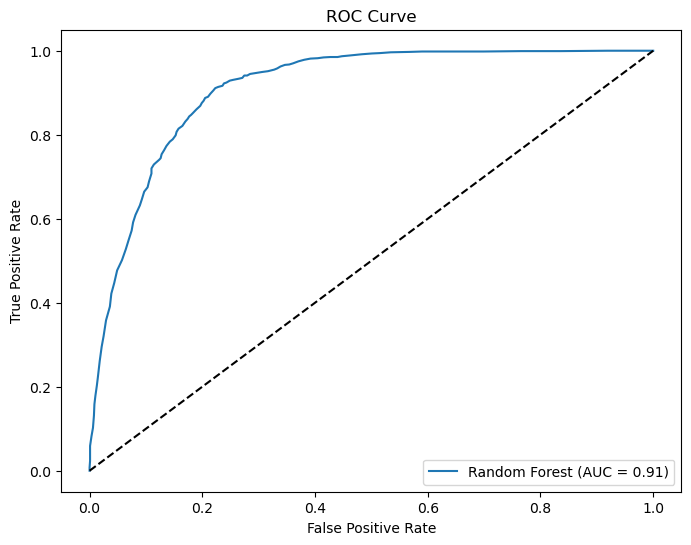

In [19]:
# plot for the best performing
y_probs_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_probs_rf):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

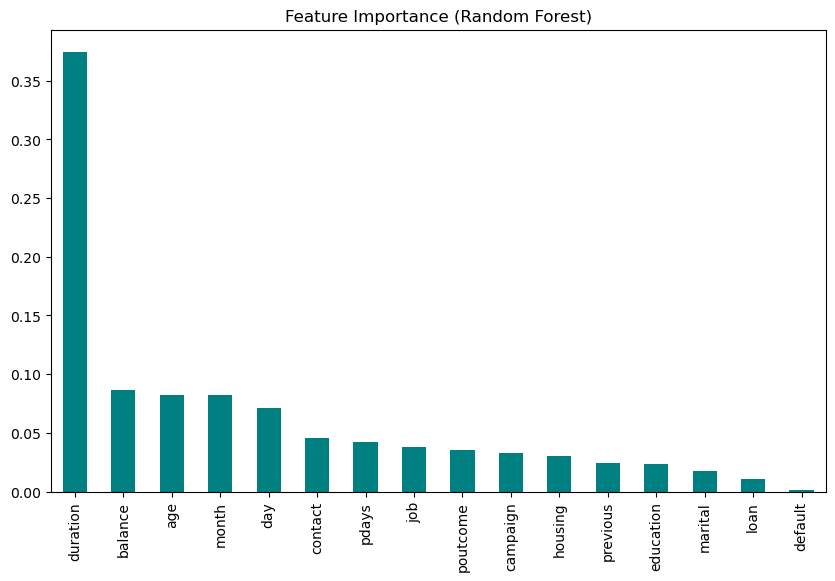

In [20]:
# feature importance from Random Forest
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance (Random Forest)')
plt.show()